# Wireless Channel Generation for Multiple Carrier Frequencies


* In this tutorial, we will analyze the performance of channel Model at multiple carrier frequencies under the propagation scenario Urban Macro or "UMa" for a Hexagonal Base Station (BS) Layout.
* For a given number of BSs and UEs we generate multi-frequency cluster level channel coefficients corresponding to every link being simulated. 

* We first import the necessary libraries then followed by creating objects of classes `AntennaArrays`, `NodeMobility`, and `SimulationLayout` respectively.

The content of the tutorial is as follows:

**Table of Contents**

* [Import Libraries](#Import-Libraries)
    - [Python Libraries](#Python-Libraries)
    - [5G Toolkit Libraries](#5G-Toolkit-Libraries)
* [Simulation Parameters](#Simulation-Parameters)
* [Generate Antenna Arrays](#Generate-Antenna-Array)
* [Node Mobility/Route](#Node-Mobility)
* [Generate Simulation Topology](#Generate-Simulation-Layout)
* [Generate Channel(LSP/SSPs) Parameters](#Generate-Channel-Parameters)
* [Generate Channel Coefficients](#Generate-Channel-Coefficients)
* [Generate OFDM Channel Generation](#Generate-OFDM-Channel)
    - [Frequency Domain: Magnitude Response Plot](#Frequency-Domain-:-Magnitude-Response-Plot)
    - [Time Domain Channel Response](#Time-Domain-Channel-response)

## Import Libraries
### Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy      as np

### 5G Toolkit Libraries

In [2]:
# importing necessary modules for simulating channel model
# import sys
# sys.path.append("../../../")

from toolkit5G.ChannelModels import NodeMobility
from toolkit5G.ChannelModels import AntennaArrays
from toolkit5G.ChannelModels import SimulationLayout
from toolkit5G.ChannelModels import ParameterGenerator
from toolkit5G.ChannelModels import ChannelGenerator

## Simulation Parameters

The simulation parameters are defined as follows
  * ``propTerrain`` defines propagation scenario or terrain for BS-UE, UE-UE, BS-BS links
  * ``carrierFrequency`` defines  array of carrier frequencies in GHz
  * ``nBSs`` defines number of Base Stations (BSs)
  * ``nUEs`` defines number of User Equipments (UEs) 
  * ``nSnapShots`` defines number of SnapShots

In [3]:
# Simulation Parameters
propTerrain      = "UMa"                          # Propagation Scenario or Terrain for BS-UE links
carrierFrequency = np.array([3*10**9, 28*10**9])  # Array of two carrier frequencies in Hz
nBSs             = 21                             # number of BSs
nUEs             = 50                             # number of UEs 
nSnapShots       = 10                             # number of SnapShots

## Generate Antenna Array

**Antenna Arrays for UEs**

The following steps describe the procedure to simulate AntennaArrays Objects at a single carrier frequency
both at Tx and Rx side:

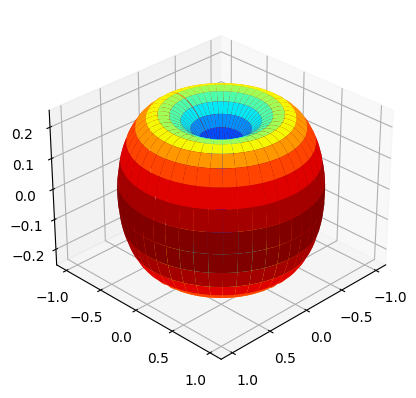

(<Figure size 960x480 with 1 Axes>, <Axes3D: >)

In [4]:
# Antenna Array at UE side
# assuming antenna element type to be "OMNI"
# with 2 panel and 2 single polarized antenna element per panel.
numCarriers = carrierFrequency.shape[0]
ueAntArray  = np.empty(numCarriers, dtype=object)
for i in range(carrierFrequency.size):
    ueAntArray[i] = AntennaArrays(antennaType     = "OMNI", 
                                  centerFrequency = carrierFrequency[i],
                                  arrayStructure  = np.array([1,1,2,2,1]))
    ueAntArray[i]() 
# Radiation Pattern of Rx antenna element 
ueAntArray[0].displayAntennaRadiationPattern()    

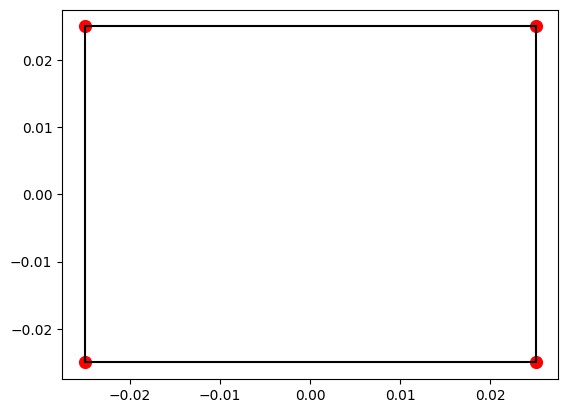

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [20]:
ueAntArray[0].displayArray("2D", markerSize = 288)

**Antenna Arrays for BS**

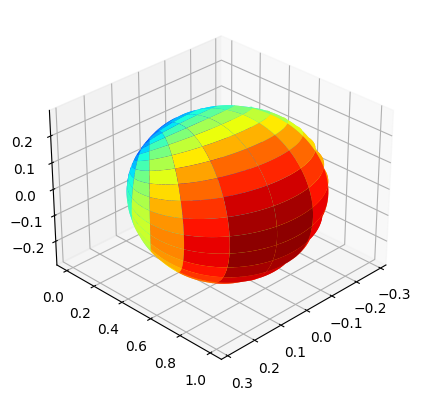

(<Figure size 960x480 with 1 Axes>, <Axes3D: >)

In [6]:
# Antenna Array at BS side
# assuming antenna element type to be "3GPP_38.901", a parabolic antenna 
# with 4 panel and 4 single polarized antenna element per panel.
numCarriers    = carrierFrequency.shape[0]
bsAntArray     = np.empty(numCarriers, dtype=object)
for i in range(carrierFrequency.size):
    bsAntArray[i] = AntennaArrays(antennaType     = "3GPP_38.901", 
                                  centerFrequency = carrierFrequency[i],
                                  arrayStructure  = np.array([1,1,4,4,1]))
    bsAntArray[i]()
# Radiation Pattern of Tx antenna element 
bsAntArray[0].displayAntennaRadiationPattern()    

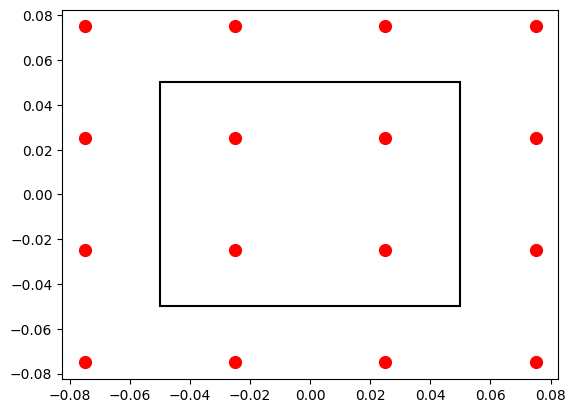

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [19]:
bsAntArray[0].displayArray("2D", markerSize = 288)

## Node Mobility

This subsection provides the following steps to simulate the mobility of each node

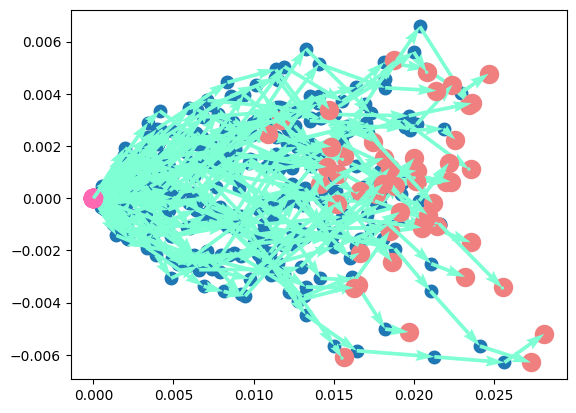

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [8]:
# NodeMobility parameters
# assuming that all the BSs are static and all the UEs are mobile.
interval = 10*0.5*10**-3/nSnapShots
timeInst = np.arange(nSnapShots, dtype=np.float32)*interval  # time values at each snapshot.
UEroute  = NodeMobility("randomWalk", nUEs, timeInst, 0, 10)
UEroute.displayRoute()

## Generate Simulation Layout

We define the simulation topology parametes:

 - ``ISD``: Inter Site Distance
 - ``minDist``: Minimum distance between transmitter and receiver.
 - ``bsHt``: BS heights 
 - ``ueHt``: UE heights
 - ``topology``: Simulation Topology
 - ``nSectorsPerSite``: Number of Sectors Per Site
 
Furthermore, users can access and update following parameters as per their requirements for channel using the handle simLayoutObj.x where x is:

 - The following parameters can be accessed or updated immendiately after object creation
    - ``UEtracks``
    - ``UELocations``
    - ``ueOrientation``
    - ``UEvelocityVector``
    - ``BStracks``
    - ``BSLocations``
    - ``bsOrientation``
    - ``BSvelocityVector``
    
 - The following parameters can be accessed or updated after calling the object
    - ``linkStateVec``
    

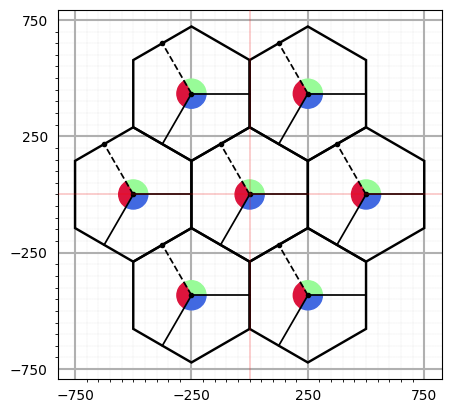

In [9]:
# Layout Parameters
isd                  = 500         # inter site distance
minDist              = 35          # min distance between each UE and BS 
ueHt                 = 1.5         # UE height
bsHt                 = 25          # BS height
bslayoutType         = "Hexagonal" # BS layout type
ueDropType           = "Hexagonal" # UE drop type
nSectorsPerSite      = 3           # number of sectors per site

# simulation layout object                                 
simLayoutObj = SimulationLayout(numOfBS = nBSs,
                                numOfUE = nUEs,
                                heightOfBS = bsHt,
                                heightOfUE = ueHt,
                                UEheightDistribution="equal",
                                UEdistibution="equal",
                                ISD = isd,
                                layoutType = bslayoutType,
                                ueDropMethod = ueDropType, 
                                numOfSectorsPerSite = nSectorsPerSite,
                                ueRoute = UEroute) 

simLayoutObj(terrain = propTerrain,
             carrierFreq = carrierFrequency, 
             ueAntennaArray = ueAntArray,
             bsAntennaArray = bsAntArray)

# displaying the topology of simulation layout
fig, ax = simLayoutObj.display2DTopology()
ax.set_xlabel("x-coordinates (m)")
ax.set_ylabel("y-coordinates (m)")
ax.set_title("Simulation Topology")
ax.legend()

## Generate Channel Parameters

* This subsection provides the steps to obtain all the cluster level channel parameters, which includes both `Large Scale Parameters (LSPs)`
  and `Small Scale Parameters (SSPs)`. 
* LSPs includes `Path Loss (PL)`, `Delay Spread (DS)` and `Angular Spreads` both in Azimuth and Zenith directions,
  and `cluster powers (Pn)` comes under SSPs.
  
- LSPs/SSPs: paramGenObj.x where x is
    - ``linkStateVec``
    - ``delaySpread``
    - ``phiAoA_LoS``, ``phiAoA_mn``, ``phiAoA_spread``
    - ``thetaAoA_LoS``, ``thetaAoA_mn``, ``thetaAoA_spread``
    - ``phiAoD_LoS``, ``phiAoD_mn``, ``phiAoD_spread``
    - ``thetaAoD_LoS``, ``thetaAoD_mn``, ``thetaAoD_spread``
    - ``xpr``
    - ``pathloss``, ``pathDelay``, ``pathPower``
    - ``shadowFading``

In [10]:
# channel parameters
paramGenObj = simLayoutObj.getParameterGenerator()

## Generate Channel Coefficients

Cluster level channel coefficients can be simulated using the following code snippet.

 - ``channel.coefficients`` with shape: `(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, numCluster/numPaths, number of Rx antennas, number of Tx antennas)`
 - ``channel.delays`` with shape: `(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, numCluster/numPaths)`


In [11]:
channel = paramGenObj.getChannel(applyPathLoss = True)

## Generate OFDM Channel

- Shape of OFDM Channel:
    - `Hf` is of shape : ``(number of carrier frequencies, number of snapshots, number of BSs, number of UEs, fftsize, number of Rx antennas, number of Tx antennas)``

In [12]:
fftsize           = 512
subcarrierSpacing = 15*10**3
Hf = channel.ofdm(subcarrierSpacing, fftsize, simLayoutObj.carrierFrequency)
# Hf.shape: (numCarrierFrequencies, numSnapShots, numBSs, numUEs, Nfft, numRxAntennas, numTxAntennas)

### Frequency Domain : Magnitude Response Plot

* The frequency domain magnitude plots (frequency responses) helps demonstate the order of frequency selectivity
    - Frequency selectivity is low for LOS Channel
    - frequency selectivity is high for NLOS Channels
    
* Wireless channel at high frequency
    - has higher path-loss
    - less frequency selective (due to lower delay spread and weak distance paths)
    


Text(0.5, 0.98, 'Channel Frequency Response at Different Carrier Frequencies')

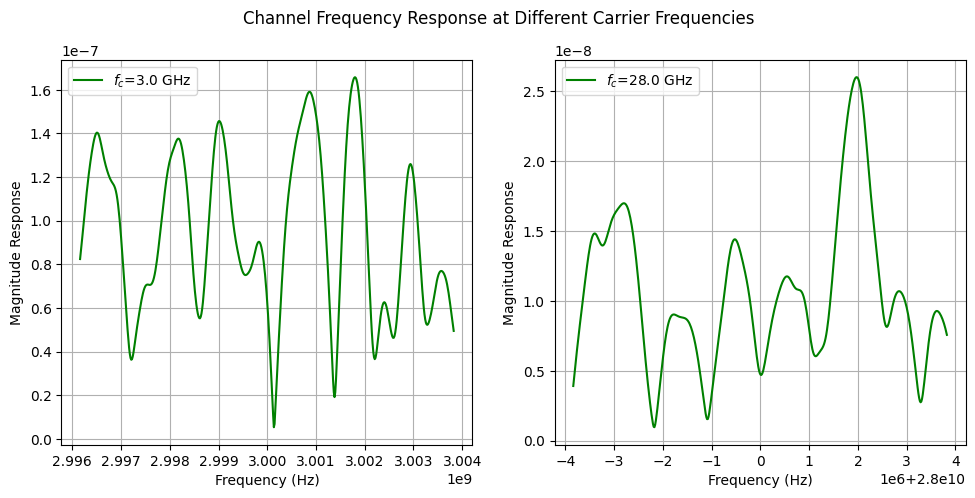

In [13]:
scaleFig = 1.5
fig, ax = plt.subplots(1,2,figsize=(17.5/scaleFig,7.5/scaleFig))
i = 0
ax[0].plot(np.arange(-channel.fftSize/2, channel.fftSize/2)*channel.subCarrierSpacing + channel.fc[0], 
           np.abs(Hf[0,0,0,i,:,0,0]), "g", label = "$f_c$="+str(channel.fc[0]/10**9)+" GHz")

ax[1].plot(np.arange(-channel.fftSize/2, channel.fftSize/2)*channel.subCarrierSpacing + channel.fc[1], 
           np.abs(Hf[1,0,0,i,:,0,0]), "g", label = "$f_c$="+str(channel.fc[1]/10**9)+" GHz")

ax[0].legend()
ax[0].set_xlabel("Frequency (Hz)")
ax[0].set_ylabel("Magnitude Response")
ax[0].grid()
ax[1].legend()
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Magnitude Response")
ax[1].grid()
fig.suptitle("Channel Frequency Response at Different Carrier Frequencies")

# plt.show()

### Time Domain Channel response

- Practical wireless channel are bandlimited which results in:
    - impulses widening:
        - higher for lower frequency channels
    - time spread
    
These effects can be observed in following plots.

In [14]:
ht = np.fft.ifft(Hf, fftsize, axis = -3)

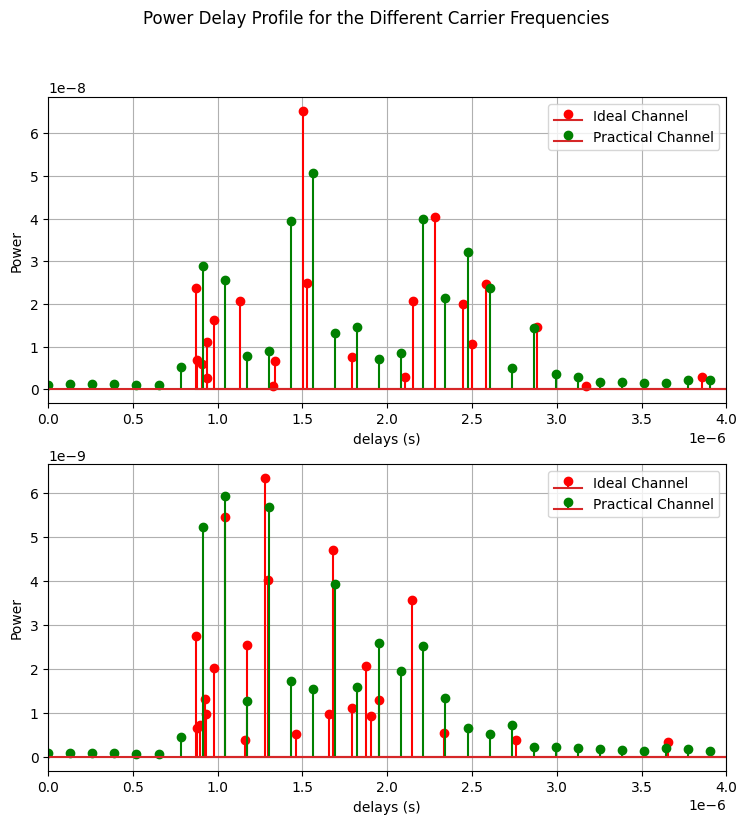

In [15]:
scaleFig = 2
fig, ax = plt.subplots(2,1,figsize=(17.5/scaleFig,17.5/scaleFig))
i = 0
ax[0].stem(channel.delays[0,0,0,i], np.abs(channel.coefficients[0,0,0,i,:,0,0]), "r", label = "Ideal Channel")
ax[0].stem(np.arange(fftsize)/(fftsize*channel.subCarrierSpacing), np.abs(ht[0,0,0,i,:,0,0]), "g", label = "Practical Channel")
ax[0].legend()
ax[0].set_xlim([0, 0.4*10**-5])
ax[0].set_xlabel("delays (s)")
ax[0].set_ylabel("Power")
ax[0].grid()

ax[1].stem(channel.delays[1,0,0,i], np.abs(channel.coefficients[1,0,0,i,:,0,0]), "r", label = "Ideal Channel")
ax[1].stem(np.arange(fftsize)/(fftsize*channel.subCarrierSpacing), np.abs(ht[1,0,0,i,:,0,0]), "g", label = "Practical Channel")
ax[1].legend()
ax[1].set_xlim([0, 0.4*10**-5])
ax[1].set_xlabel("delays (s)")
ax[1].set_ylabel("Power")
ax[1].grid()

fig.suptitle("Power Delay Profile for the Different Carrier Frequencies")
plt.show()